In [32]:
#KNNIRIS
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')

In [33]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [34]:
df=pd.read_csv('Iris.csv')

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


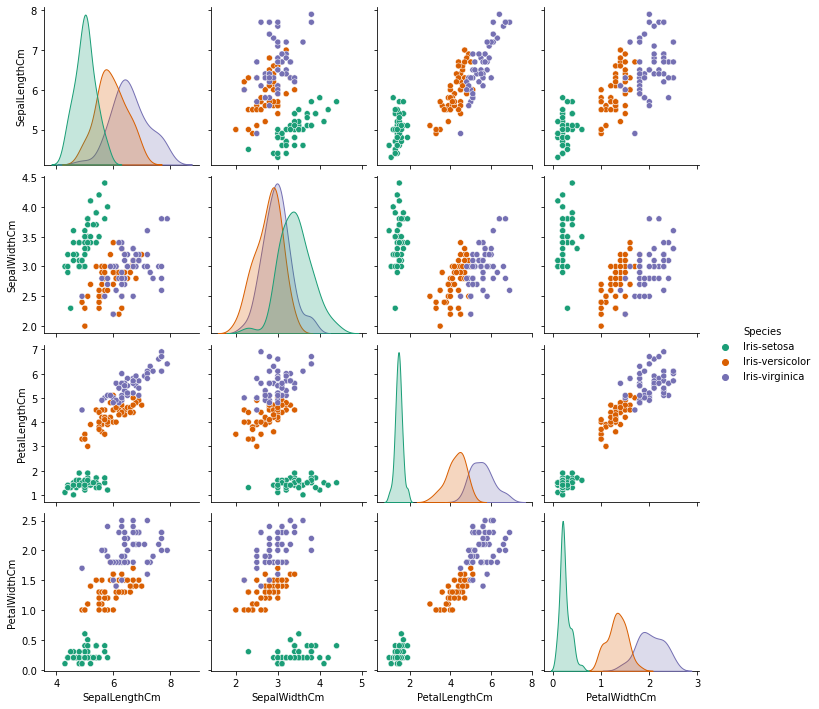

In [37]:
#eda
sns.pairplot(df,hue='Species',palette='Dark2')

In [38]:
import matplotlib as mpl
cmap = mpl.colormaps['viridis']
from matplotlib.colors import Normalize

C:\Users\vigne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vigne\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

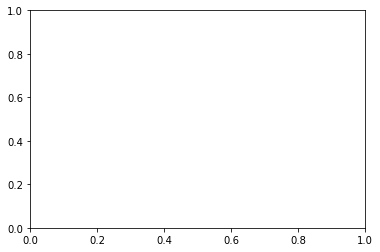

In [39]:
setosa =df[df['Species']=='setosa']
sns.kdeplot(setosa['SepalWidthCm'],setosa['SepalLengthCm'],cmap="plasma",shade_lowest=False)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler= StandardScaler()

In [42]:
scaler.fit(df.drop('Species',axis=1))

StandardScaler()

In [43]:
scaled_features = scaler.transform(df.drop('Species',axis=1))

In [44]:
iris_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
iris_feat.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df['Species'],test_size=0.30, random_state=102)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
pred=knn.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
print(confusion_matrix(Y_test,pred))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


In [55]:
print(classification_report(Y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [60]:
#Choosing a better K value
error_rate = [] 
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate. append (np. mean (pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

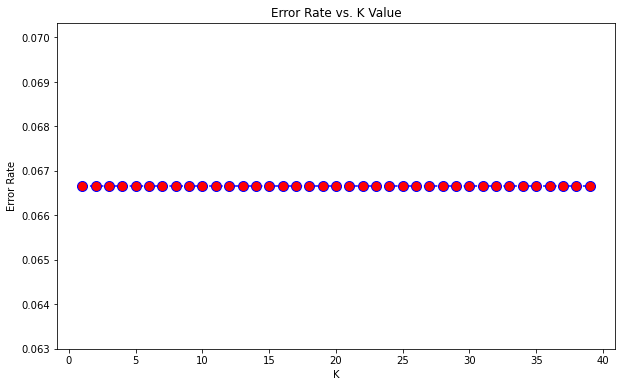

In [64]:
plt.figure(figsize=(10,6))
plt.plot (range(1,40), error_rate, color= 'blue', linestyle= 'dashed', marker='o',
                              markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
# good K Value
# K=3
knn = KNeighborsClassifier (n_neighbors=3)
knn.fit(X_train,Y_train)
pred = knn. predict (X_test)
print ( 'WITH K=3')
print ('\n' )
print (confusion_matrix(Y_test, pred))
print ('\n')
print (classification_report (Y_test,pred))

WITH K=3


[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

